<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-01-16 13:35:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  32.3MB/s    in 4.7s    

2025-01-16 13:35:07 (32.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


/tmp/ipykernel_3239/2363312707.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Age',


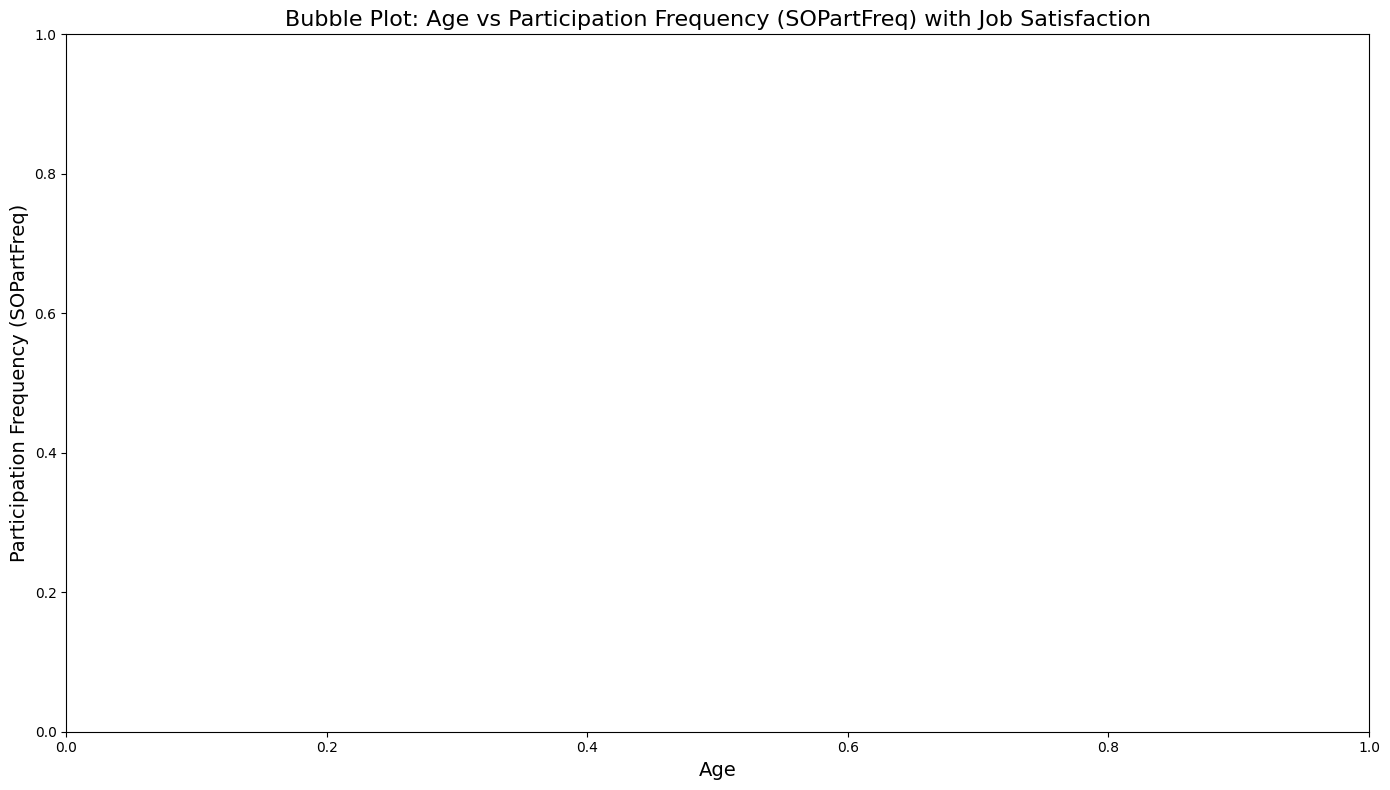

In [5]:
##Write your code here
import seaborn as sns



# Step 3: Ensure numeric columns (SOPartFreq and JobSat) are numeric, forcing errors to NaN
df['SOPartFreq'] = pd.to_numeric(df['SOPartFreq'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Step 4: Drop rows where there are NaN values in critical columns after conversion
df.dropna(subset=['SOPartFreq', 'JobSat'], inplace=True)

# Step 5: Create the bubble plot
plt.figure(figsize=(14, 8))

# Create the scatter plot with bubble sizes corresponding to JobSat
sns.scatterplot(x='Age', 
                y='SOPartFreq', 
                size='JobSat',  # Size of the bubbles represents job satisfaction
                sizes=(20, 200),  # Adjust bubble size range
                hue='JobSat',  # Color the points by job satisfaction
                palette='viridis',  # Choose a color palette
                data=df, 
                alpha=0.6,  # Transparency of points
                legend=False)  # Disable legend for bubble sizes

# Step 6: Customize the plot
plt.title('Bubble Plot: Age vs Participation Frequency (SOPartFreq) with Job Satisfaction', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Participation Frequency (SOPartFreq)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


/tmp/ipykernel_3239/2610576891.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='ConvertedCompYearly',


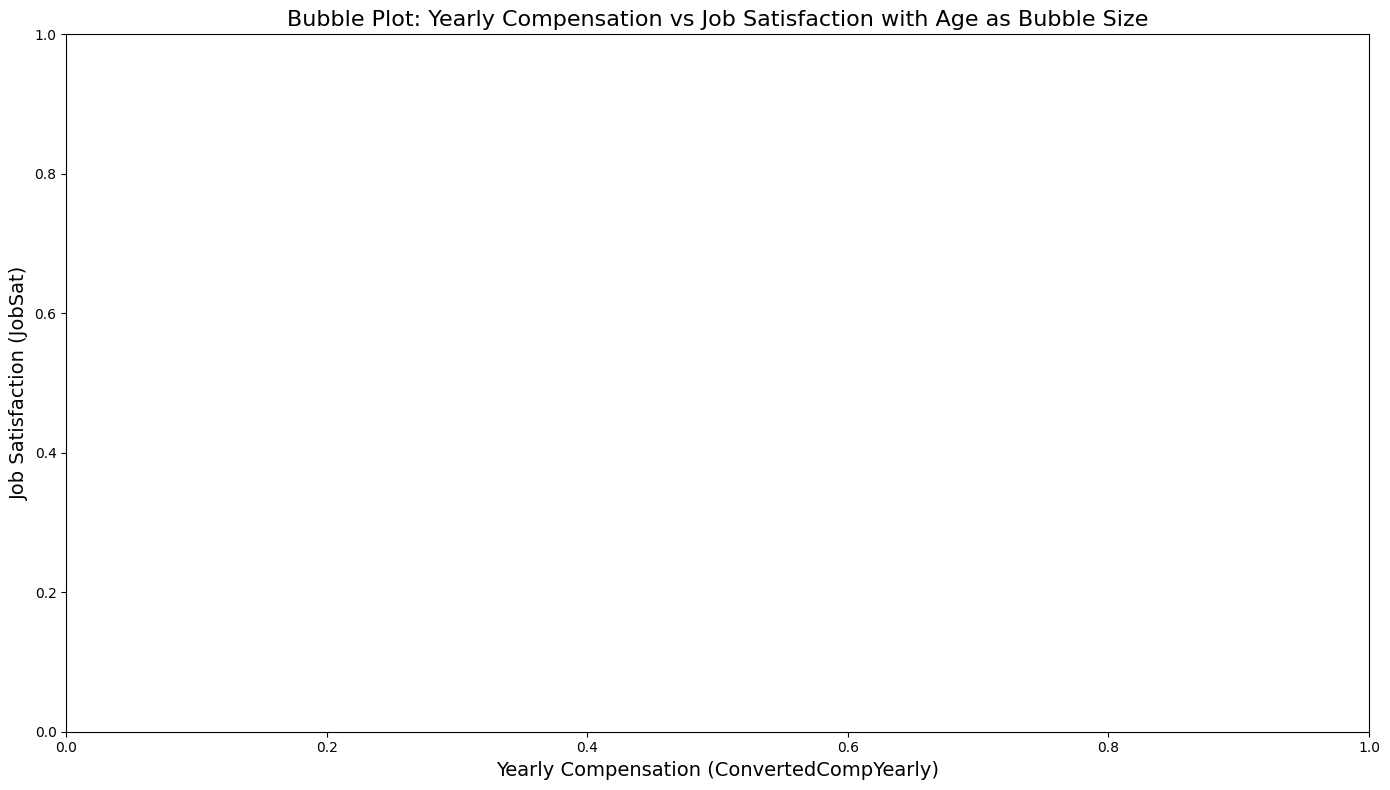

In [6]:
##Write your code here

# Step 2: Clean the data (remove rows with missing values in relevant columns)
df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'], inplace=True)

# Step 3: Ensure numeric columns are of correct type
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 4: Drop rows where any of the relevant columns are NaN after conversion
df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'], inplace=True)

# Step 5: Create the bubble plot
plt.figure(figsize=(14, 8))

# Create the scatter plot with bubble sizes corresponding to Age
sns.scatterplot(x='ConvertedCompYearly', 
                y='JobSat', 
                size='Age',  # Size of the bubbles represents Age
                sizes=(20, 200),  # Adjust bubble size range
                hue='JobSat',  # Color the points by Job Satisfaction
                palette='viridis',  # Choose a color palette
                data=df, 
                alpha=0.6,  # Transparency of points
                legend=False)  # Disable legend for bubble sizes

# Step 6: Customize the plot
plt.title('Bubble Plot: Yearly Compensation vs Job Satisfaction with Age as Bubble Size', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.ylabel('Job Satisfaction (JobSat)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_3239/2001257945.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='AgeGroup',


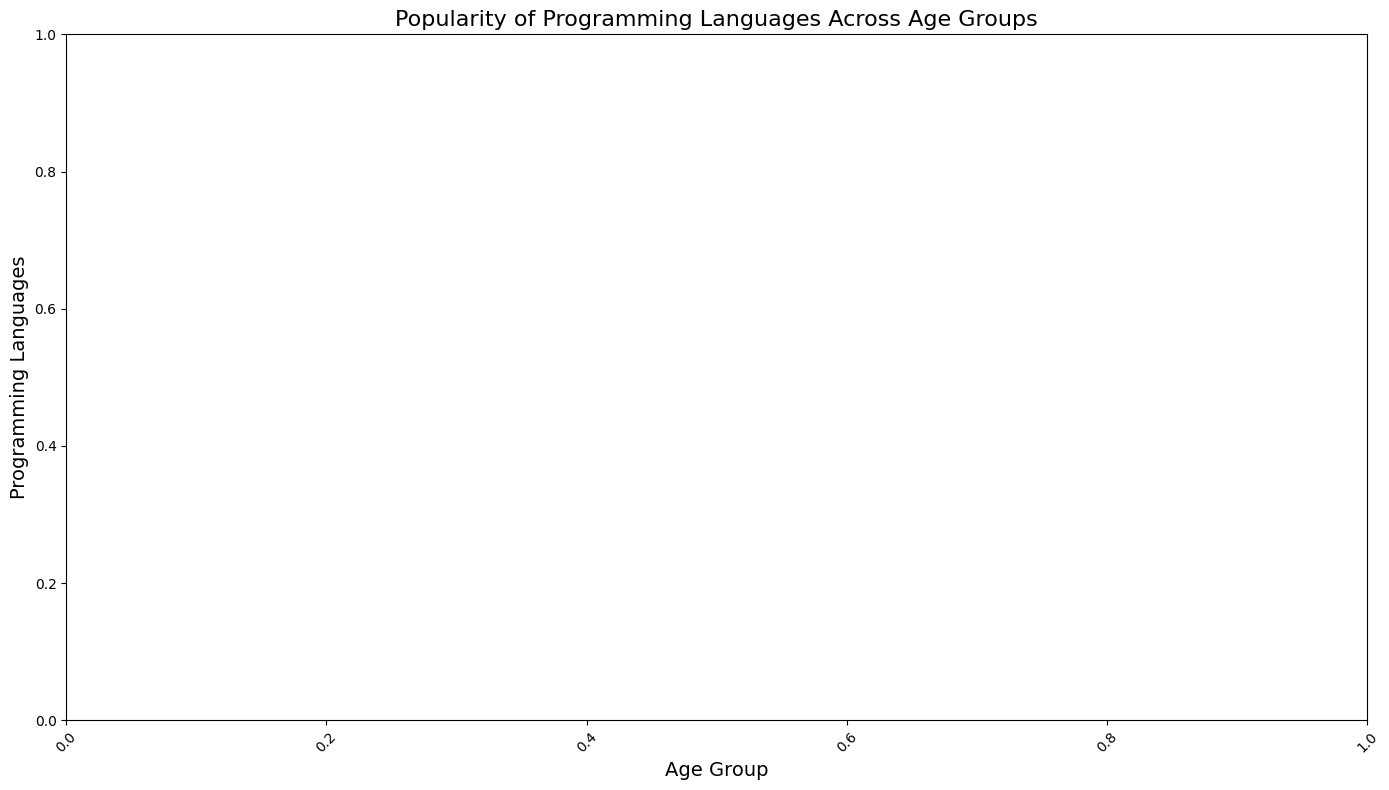

In [7]:
##Write your code here

# Step 2: Clean the data (remove rows with missing values in relevant columns)
df.dropna(subset=['LanguageHaveWorkedWith', 'Age'], inplace=True)

# Step 3: Split the 'LanguageHaveWorkedWith' column into a list of languages
df['Languages'] = df['LanguageHaveWorkedWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

# Step 4: Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age ranges
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Labels for the age ranges
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 5: Create a DataFrame to count the frequency of languages in each age group
# We will count how many times each language appears in each age group
age_grouped_languages = []

for index, row in df.iterrows():
    for language in row['Languages']:
        age_grouped_languages.append([row['AgeGroup'], language])

# Convert the list into a DataFrame
languages_df = pd.DataFrame(age_grouped_languages, columns=['AgeGroup', 'Language'])

# Step 6: Calculate the frequency of each language in each age group
language_counts = languages_df.groupby(['AgeGroup', 'Language']).size().reset_index(name='Frequency')

# Step 7: Create the bubble plot
plt.figure(figsize=(14, 8))

# Create the bubble plot
sns.scatterplot(x='AgeGroup', 
                y='Language', 
                size='Frequency',  # Bubble size represents language frequency
                hue='Language',  # Color the points by Language
                data=language_counts, 
                sizes=(20, 1000),  # Adjust the bubble size range
                palette='Set2',  # Use a distinct color palette
                legend=False,  # Hide the legend for bubble size
                alpha=0.7)  # Transparency of bubbles

# Step 8: Customize the plot
plt.title('Popularity of Programming Languages Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Programming Languages', fontsize=14)
plt.xticks(rotation=45)  # Rotate age group labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


Missing values in DatabaseWantToWorkWith or JobSatPoints_6:
DatabaseWantToWorkWith    0
JobSatPoints_6            0
dtype: int64
Unique entries in 'DatabaseWantToWorkWith':
[]
Example entries in 'Databases' column after splitting:
Series([], Name: Databases, dtype: object)
Database counts:
Empty DataFrame
Columns: [JobSatPoints_6, Database, Frequency]
Index: []


/tmp/ipykernel_3239/1651114083.py:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Database',


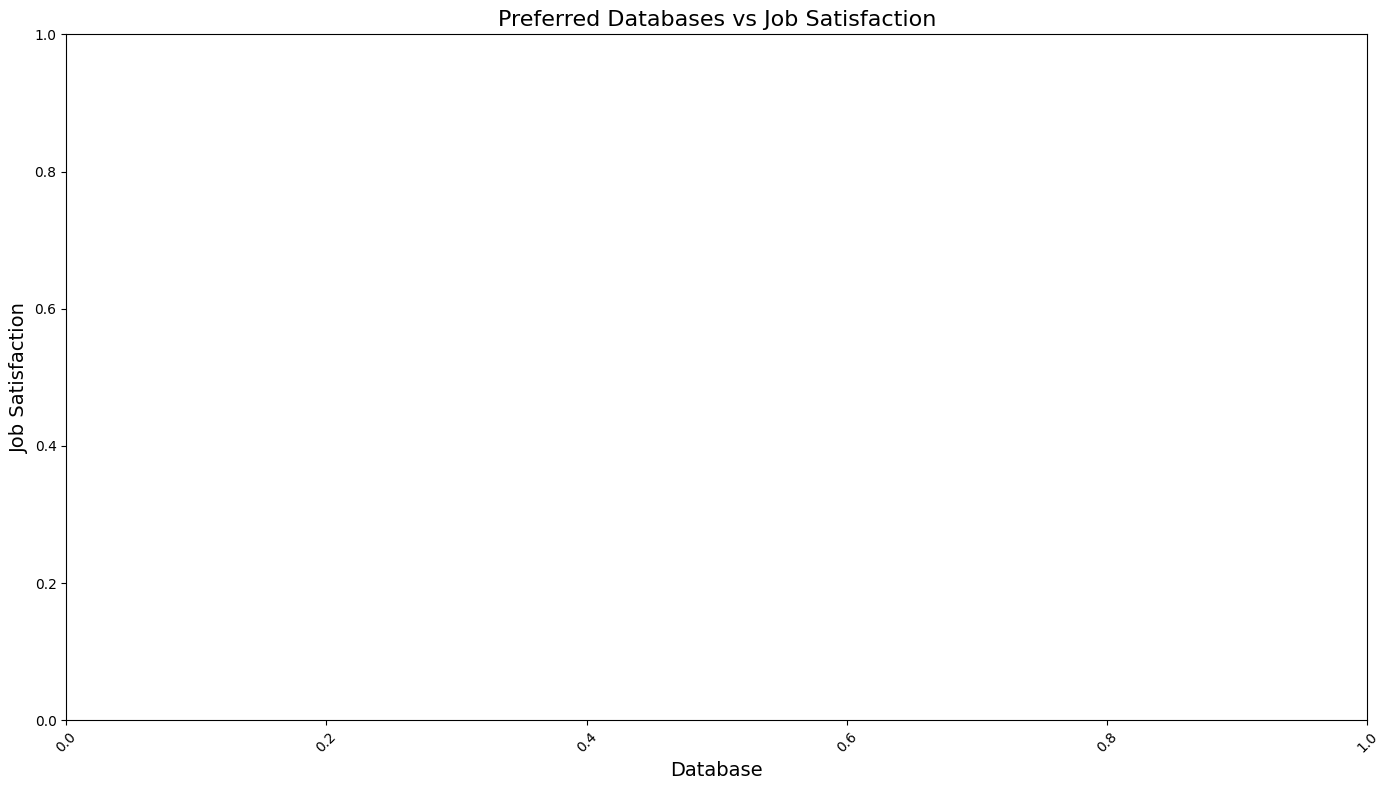

Empty DataFrame
Columns: [DatabaseWantToWorkWith]
Index: []


In [10]:
##Write your code here

# Step 2: Check for missing values in relevant columns
print("Missing values in DatabaseWantToWorkWith or JobSatPoints_6:")
print(df[['DatabaseWantToWorkWith', 'JobSatPoints_6']].isnull().sum())

# Step 3: Clean the data (remove rows with missing values in relevant columns)
df.dropna(subset=['DatabaseWantToWorkWith', 'JobSatPoints_6'], inplace=True)

# Step 4: Check how the 'DatabaseWantToWorkWith' column is formatted
print("Unique entries in 'DatabaseWantToWorkWith':")
print(df['DatabaseWantToWorkWith'].unique())

# Step 5: Split the 'DatabaseWantToWorkWith' column into a list of databases
df['Databases'] = df['DatabaseWantToWorkWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

# Step 6: Check the new 'Databases' column for correctness
print("Example entries in 'Databases' column after splitting:")
print(df['Databases'].head())

# Step 7: Create a DataFrame to count the frequency of databases by job satisfaction
databases_df = []

for index, row in df.iterrows():
    for database in row['Databases']:
        databases_df.append([row['JobSatPoints_6'], database])

# Convert the list into a DataFrame
databases_df = pd.DataFrame(databases_df, columns=['JobSatPoints_6', 'Database'])

# Step 8: Calculate the frequency of each database at each job satisfaction level
database_counts = databases_df.groupby(['JobSatPoints_6', 'Database']).size().reset_index(name='Frequency')

# Step 9: Check the resulting database counts to make sure we have valid data
print("Database counts:")
print(database_counts.head())

# Step 10: Create the bubble plot
plt.figure(figsize=(14, 8))

# Create the bubble plot
sns.scatterplot(x='Database', 
                y='JobSatPoints_6', 
                size='Frequency',  # Bubble size represents database frequency
                hue='Database',  # Color the points by Database
                data=database_counts, 
                sizes=(20, 1000),  # Adjust the bubble size range
                palette='Set2',  # Use a distinct color palette
                legend=False,  # Hide the legend for bubble size
                alpha=0.7)  # Transparency of bubbles

# Step 11: Customize the plot
plt.title('Preferred Databases vs Job Satisfaction', fontsize=16)
plt.xlabel('Database', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.xticks(rotation=45)  # Rotate database names for better readability

# Show the plot
plt.tight_layout()
plt.show()

print(df[['DatabaseWantToWorkWith']].head(20))  # Look at the first 20 rows of the column


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


/tmp/ipykernel_3239/701866918.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=role_compensation,


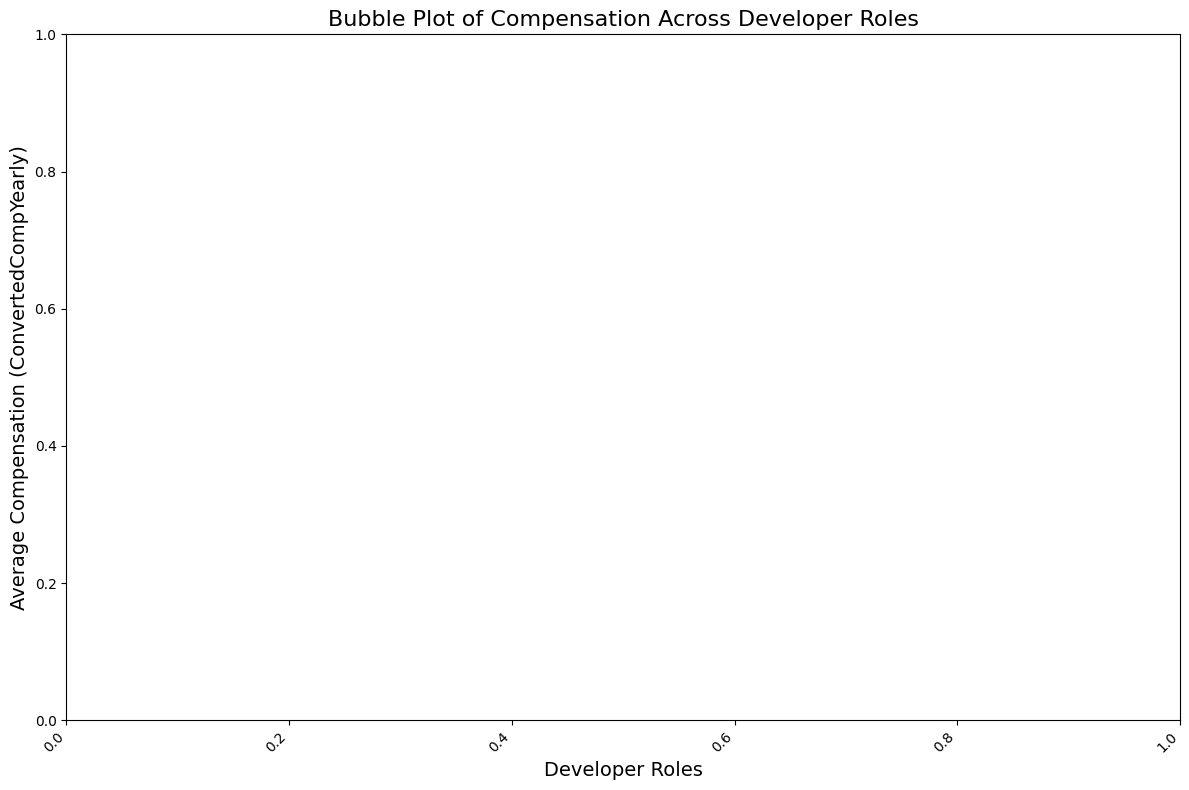

In [11]:
##Write your code here

# Step 1: Clean the data by removing rows with missing values in the relevant columns
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSatPoints_6'])

# Step 2: Group by Developer Type (DevType), calculate the average compensation and job satisfaction
role_compensation = df_cleaned.groupby('DevType').agg(
    avg_compensation=('ConvertedCompYearly', 'mean'),
    avg_job_satisfaction=('JobSatPoints_6', 'mean'),
    role_frequency=('DevType', 'size')
).reset_index()

# Step 3: Create the bubble plot
plt.figure(figsize=(12, 8))

# Plot the scatter plot, adjusting bubble size based on role frequency
sns.scatterplot(data=role_compensation, 
                x='DevType', 
                y='avg_compensation', 
                size='role_frequency', 
                hue='avg_job_satisfaction', 
                palette='coolwarm', 
                sizes=(100, 1000),  # Adjust the size range of the bubbles
                legend=None,  # Turn off legend for 'size' and 'hue'
                marker='o',  # Bubble marker style
                alpha=0.6)

# Step 4: Customize the plot
plt.title('Bubble Plot of Compensation Across Developer Roles', fontsize=16)
plt.xlabel('Developer Roles', fontsize=14)
plt.ylabel('Average Compensation (ConvertedCompYearly)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_3239/3408127424.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  collab_tools_counts = collab_tools_counts.groupby(['AgeGroup', 'CollabTools']).size().reset_index(name='Frequency')
/tmp/ipykernel_3239/3408127424.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=collab_tools_counts,


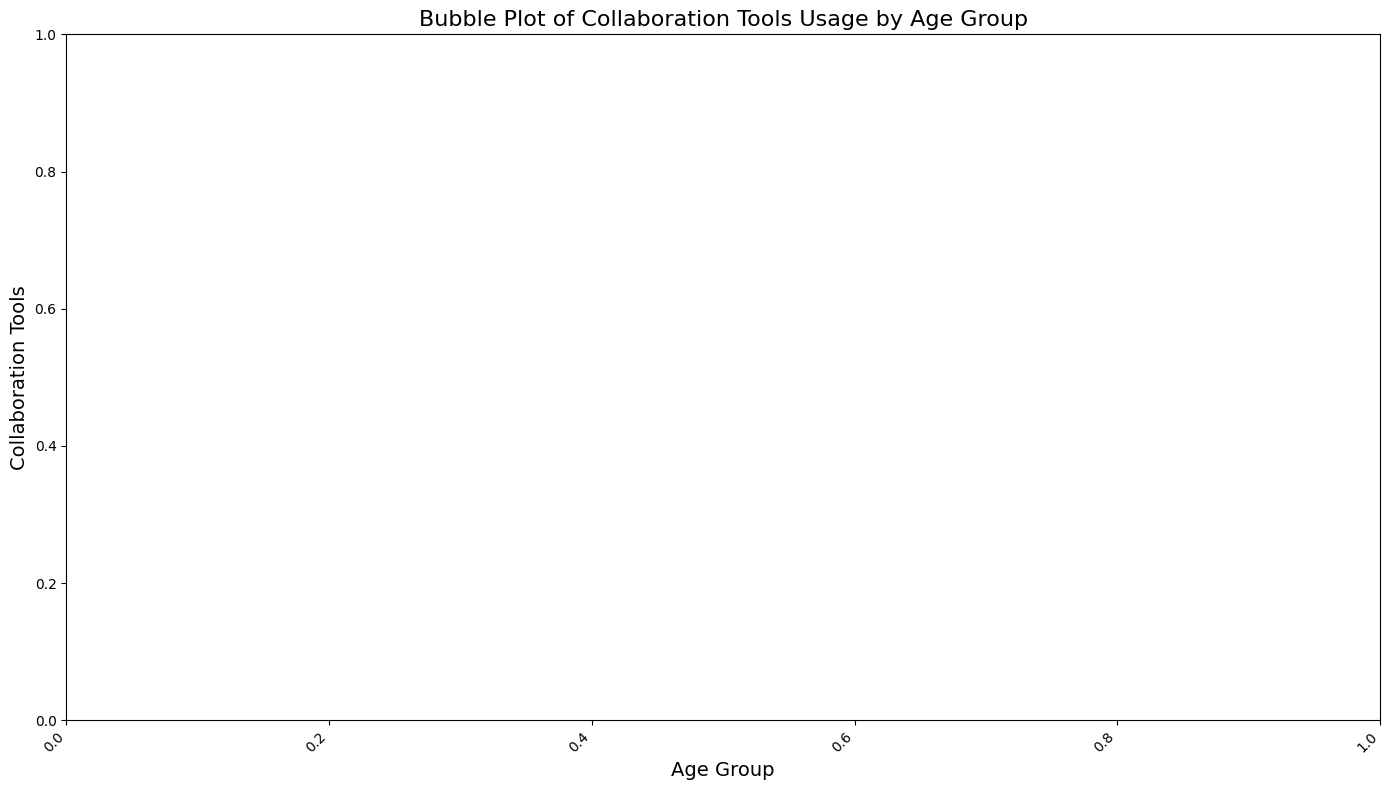

In [12]:
##Write your code here

# Step 1: Clean the data by removing rows with missing values in the relevant columns
df_cleaned = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Step 2: Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age ranges
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Labels for the age ranges
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Step 3: Split the `NEWCollabToolsHaveWorkedWith` column and get tool counts for each age group
# Split tools into separate columns based on commas
df_cleaned['CollabTools'] = df_cleaned['NEWCollabToolsHaveWorkedWith'].str.split(',')

# Create a new dataframe to count the tool usage by age group
collab_tools_counts = df_cleaned.explode('CollabTools')  # This will create a row for each tool used by a respondent
collab_tools_counts = collab_tools_counts.groupby(['AgeGroup', 'CollabTools']).size().reset_index(name='Frequency')

# Step 4: Create the bubble plot
plt.figure(figsize=(14, 8))

# Use a scatter plot to represent the frequency of tool usage by age group
sns.scatterplot(data=collab_tools_counts, 
                x='AgeGroup', 
                y='CollabTools', 
                size='Frequency', 
                hue='Frequency', 
                palette='coolwarm',  # Color the points based on frequency
                sizes=(100, 1000),  # Adjust the size range of the bubbles
                legend=None,  # Turn off legend for 'size' and 'hue'
                marker='o',  # Bubble marker style
                alpha=0.6)

# Step 5: Customize the plot
plt.title('Bubble Plot of Collaboration Tools Usage by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Collaboration Tools', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



/tmp/ipykernel_3239/3178033843.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=webframe_counts,


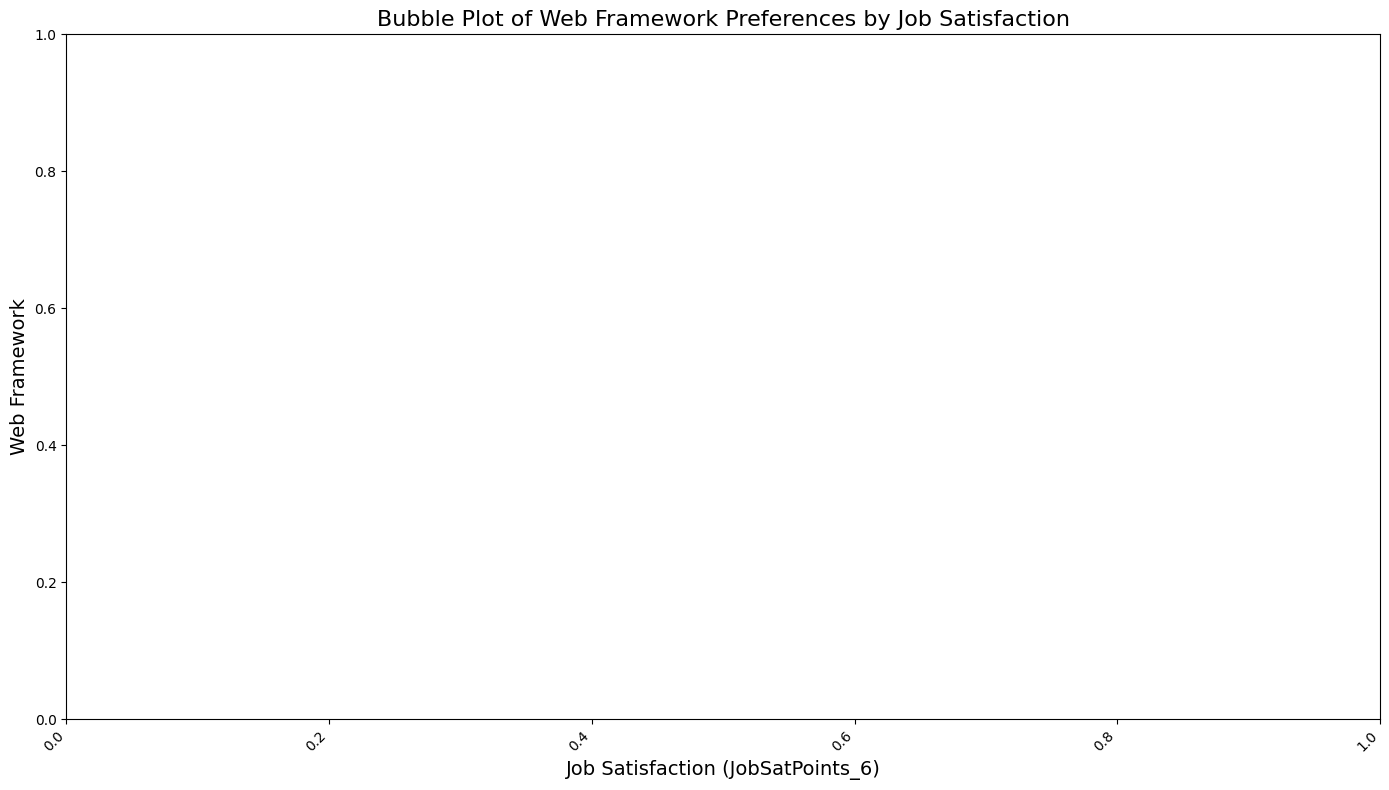

In [13]:
##Write your code here

# Step 1: Clean the data by removing rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['WebframeWantToWorkWith', 'JobSatPoints_6'])

# Step 2: Split the `WebframeWantToWorkWith` column and get framework counts for each job satisfaction level
df_cleaned['Webframe'] = df_cleaned['WebframeWantToWorkWith'].str.split(',')

# Explode the `Webframe` column to get a row for each framework
webframe_counts = df_cleaned.explode('Webframe')

# Group by `JobSatPoints_6` (job satisfaction) and `Webframe` to get the counts
webframe_counts = webframe_counts.groupby(['JobSatPoints_6', 'Webframe']).size().reset_index(name='Frequency')

# Step 3: Create the bubble plot
plt.figure(figsize=(14, 8))

# Use a scatter plot to represent the frequency of tool usage by job satisfaction and web frameworks
sns.scatterplot(data=webframe_counts, 
                x='JobSatPoints_6', 
                y='Webframe', 
                size='Frequency', 
                hue='Frequency',  # Color the points based on frequency
                palette='coolwarm',  # Color palette
                sizes=(100, 1000),  # Adjust the size range of the bubbles
                legend=None,  # Turn off legend for 'size' and 'hue'
                marker='o',  # Bubble marker style
                alpha=0.6)

# Step 4: Customize the plot
plt.title('Bubble Plot of Web Framework Preferences by Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.ylabel('Web Framework', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

# Step 1: Clean the data by removing rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['LanguageAdmired', 'Country'])

# Step 2: Split the `LanguageAdmired` column and get technology counts for each country
df_cleaned['AdmiredLanguages'] = df_cleaned['LanguageAdmired'].str.split(',')

# Explode the `AdmiredLanguages` column to get a row for each admired language
admired_language_counts = df_cleaned.explode('AdmiredLanguages')

# Group by `Country` and `AdmiredLanguages` to get the counts
admired_language_counts = admired_language_counts.groupby(['Country', 'AdmiredLanguages']).size().reset_index(name='Frequency')

# Step 3: Create the bubble plot
plt.figure(figsize=(14, 8))

# Use a scatter plot to represent the frequency of admired languages by country
sns.scatterplot(data=admired_language_counts, 
                x='Country', 
                y='AdmiredLanguages', 
                size='Frequency', 
                hue='Frequency',  # Color the points based on frequency
                palette='viridis',  # Color palette
                sizes=(100, 1000),  # Adjust the size range of the bubbles
                legend=None,  # Turn off legend for 'size' and 'hue'
                marker='o',  # Bubble marker style
                alpha=0.6)

# Step 4: Customize the plot
plt.title('Admired Technologies Across Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Admired Technology', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
